In [1]:
library(tidyverse)
library(tsibble)
library(feasts)
library(fable)
library(tsibbledata)
library(fpp3)
library(patchwork)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'tsibble'


The following object is masked from 'package:lubridate':

    interval


The following objects are masked from 'package:base':

    intersect, setdiff, union


Loading required package: fabletools



ERROR: Error in library(tsibbledata): there is no package called 'tsibbledata'


In [ ]:
vic_elec

In [ ]:
p <- vic_elec %>% 
    autoplot(Demand)

plotly::ggplotly(p)

In [ ]:
s_y <- vic_elec %>% 
  gg_season(Demand, period = "year")
s_w <- vic_elec %>% 
  gg_season(Demand, period = "week")
s_d <- vic_elec %>% 
  gg_season(Demand, period = "day")

s_y / s_w / s_d


In [ ]:
# | fig-height: 10

comp_stl <- vic_elec %>% 
  model(
    STL(Demand, robust = TRUE)
  ) %>% 
  components() 

comp_stl %>% 
  autoplot()


In [ ]:
comp_stl %>% 
  autoplot(season_year)
comp_stl %>% 
  autoplot(season_week)
comp_stl %>% 
  autoplot(season_day)
comp_stl %>% 
  ggplot(aes(x = Time, y = season_adjust)) +
  geom_line()


In [ ]:
vic_train <- vic_elec %>% 
  filter_index(. ~ "2014-09-30")

fit1 <- vic_train %>% 
  model(ets = ETS(Demand ~ error("A") + trend("Ad") + season("A")))

report(fit1)

In [ ]:
p <- vic_train %>% 
  autoplot(Demand) +
  geom_line(aes(y = .fitted), data = fit1 %>% augment(), color = "firebrick")

plotly::ggplotly(p)


In [ ]:
accuracy(fit1)

In [ ]:
{r}
fit2 <- vic_train %>% 
  model(
    dcmp = decomposition_model(
      STL(Demand, robust = TRUE),
      ETS(season_adjust ~ error("A") + trend("Ad") + season("N"))
    )
  )

fit2 %>% report()


In [ ]:
{r}
fit3 <- vic_train %>% 
  model(
    harmonic = ARIMA(Demand ~ fourier(period = "year", K = 5) +
                       fourier(period = "week", K = 3) +
                       fourier(period = "day", K = 3) + PDQ(0,0,0) + pdq(2,0,2))
  )

report(fit3)


In [ ]:
{r}
p <- vic_train %>% 
  autoplot(Demand) +
  geom_line(aes(y = .fitted), data = fit3 %>% augment(), color = "firebrick")

plotly::ggplotly(p)


In [ ]:
{r}
fc3 <- fit3 %>% 
  forecast(h = "3 months")

fc3 %>% 
  autoplot(vic_elec %>% filter_index("2014-10-01"~.), level = NULL)

fc3 %>% 
  autoplot(vic_elec %>% filter_index("2014-10-01"~.))

fc3 %>% 
  accuracy(vic_elec)


In [ ]:
{r}
elec <- vic_elec |>
  mutate(
    DOW = wday(Date, label = TRUE),
    Working_Day = !Holiday & !(DOW %in% c("Sat", "Sun")),
    Cooling = pmax(Temperature, 18)
  )
elec |>
  ggplot(aes(x=Temperature, y=Demand, col=Working_Day)) +
  geom_point(alpha = 0.6) +
  labs(x="Temperature (degrees Celsius)", y="Demand (MWh)")


In [2]:
library(tidyquant)
library(tidyverse)
library(tsibble)
library(fable)
library(feasts)
data = tq_get("^GSPC", get="stock.prices", from = "2022-01-01", to = "2024-03-28") %>% select(date, adjusted) %>% as_tsibble(index = date)


Loading required package: PerformanceAnalytics

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following object is masked from 'package:tsibble':

    index


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                     

In [3]:
data

date,adjusted
<date>,<dbl>
2022-01-03,4796.56
2022-01-04,4793.54
2022-01-05,4700.58
2022-01-06,4696.05
2022-01-07,4677.03
2022-01-10,4670.29
2022-01-11,4713.07
2022-01-12,4726.35
2022-01-13,4659.03


### Series

In [4]:
calls <- data |>
  mutate(t = row_number()) |>
  update_tsibble(index = t, regular = TRUE) %>% select(t, adjusted)
calls

t,adjusted
<int>,<dbl>
1,4796.56
2,4793.54
3,4700.58
4,4696.05
5,4677.03
6,4670.29
7,4713.07
8,4726.35
9,4659.03


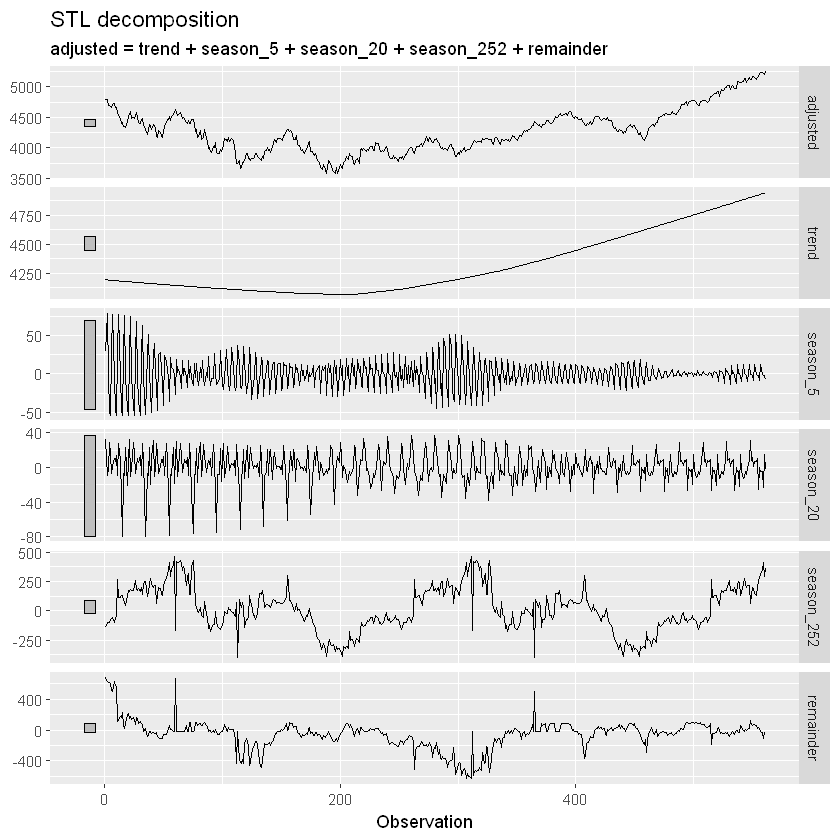

In [5]:
calls <- data |>
  mutate(t = row_number()) |>
  update_tsibble(index = t, regular = TRUE) %>% select(t, adjusted)
calls |>
  model(
    STL(adjusted ~ season(period = 5) + season(period = 20) + season(period = 252),
        robust = TRUE)
  ) |>
  components() |>
  autoplot() + labs(x = "Observation")

In [15]:
my_dcmp_spec <- decomposition_model(
  STL(adjusted ~ season(period = 5),
      robust = TRUE),
  ETS(season_adjust ~ season("N"))
)
fc <- calls |>
  model(my_dcmp_spec) |>
  forecast(h = 25)


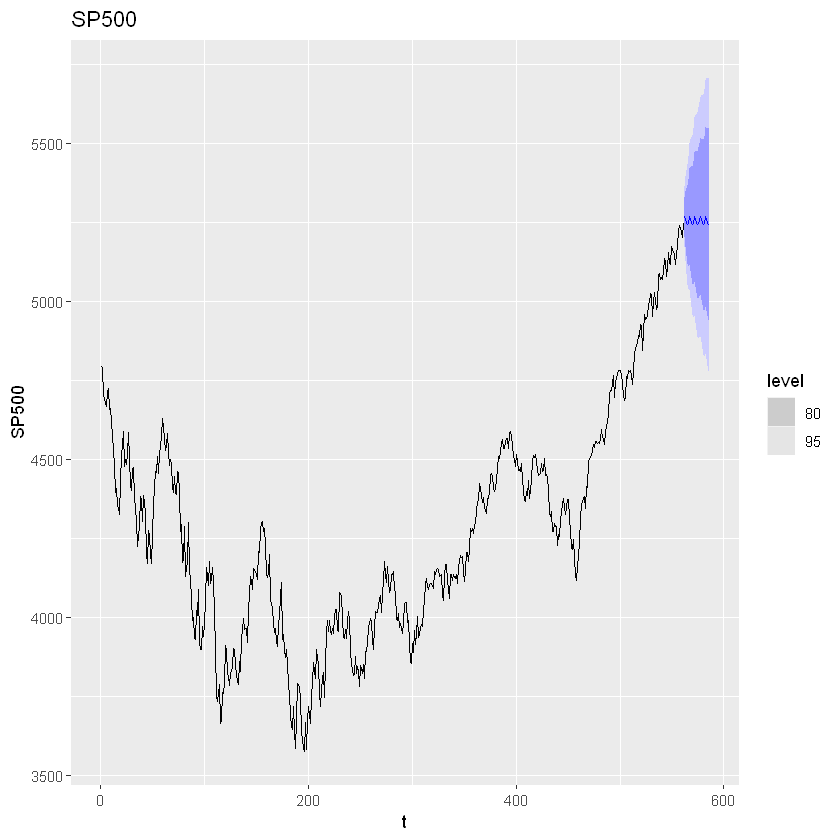

In [7]:
plot = fc |>
  fill_gaps() |>
  autoplot(calls) +
  labs(y = "SP500",
       title = "SP500")
plot

cambiando los valores *K* afecta los componentes para hacer la predicción, entre mas valores K mas se afecta la predicción.

In [8]:
fit3 <- calls %>% 
  model(
    harmonic = ARIMA(adjusted ~ trend() + fourier(period = 5, K = 2) + fourier(period = 25, K = 4) + fourier(period = 252, K = 10))
  )

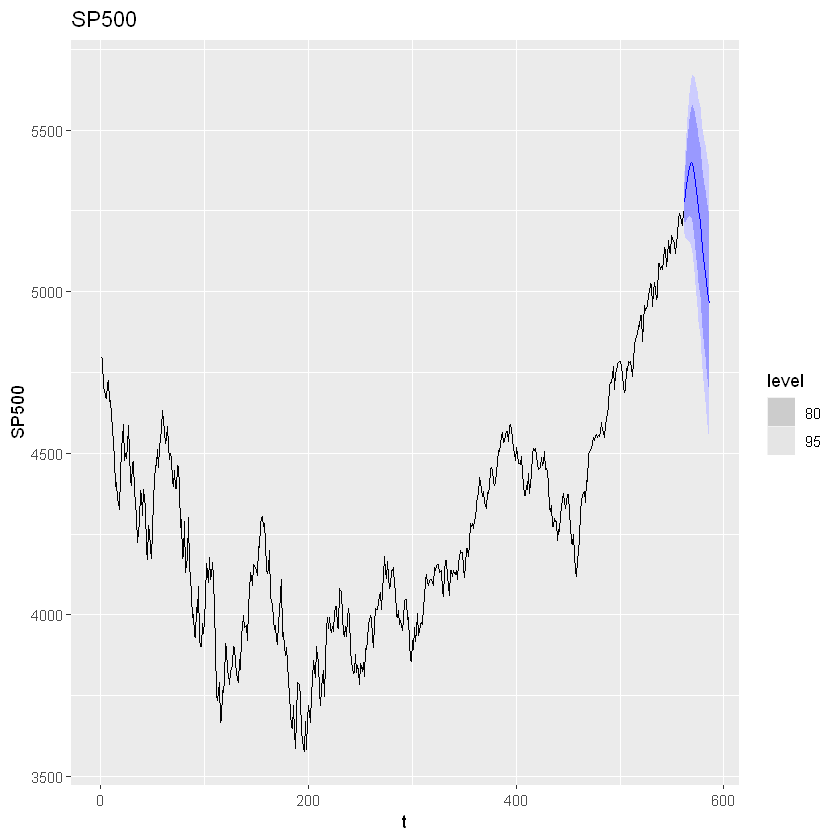

In [9]:
fc <- fit3 %>%
  forecast(h = 25)

fc |>
  fill_gaps() |>
  autoplot(calls) +
  labs(y = "SP500",
       title = "SP500")

In [10]:
data_fill_na = fill_gaps(data) %>% fill(adjusted, .direction = "down")

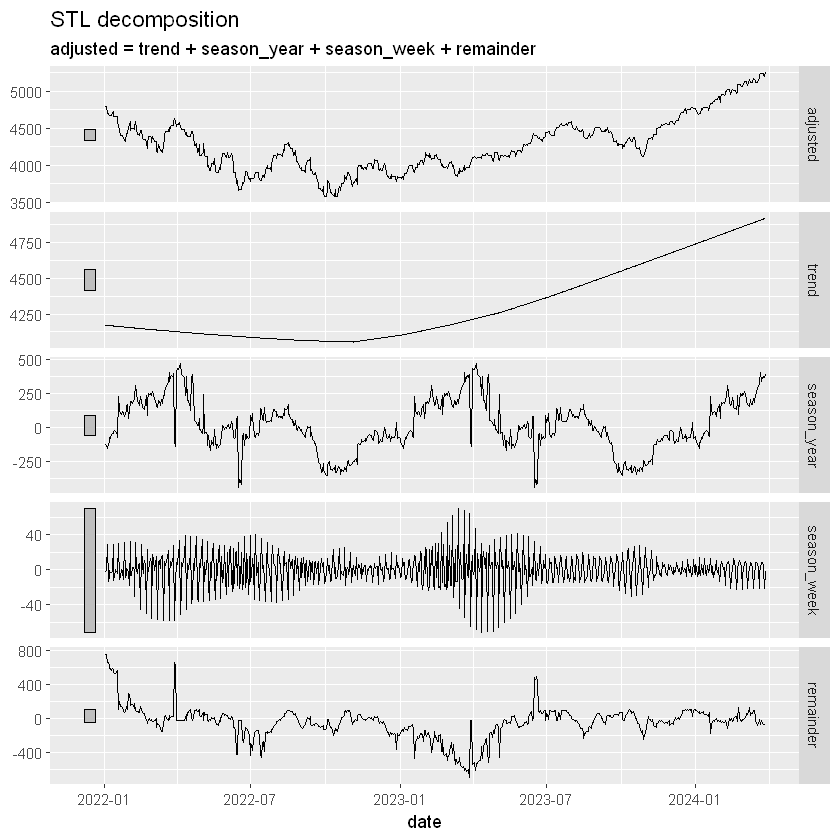

In [11]:
comp_stl <- data_fill_na %>% 
  model(
    STL(adjusted, robust = TRUE)
  ) %>% 
  components() 

comp_stl %>% 
  autoplot()

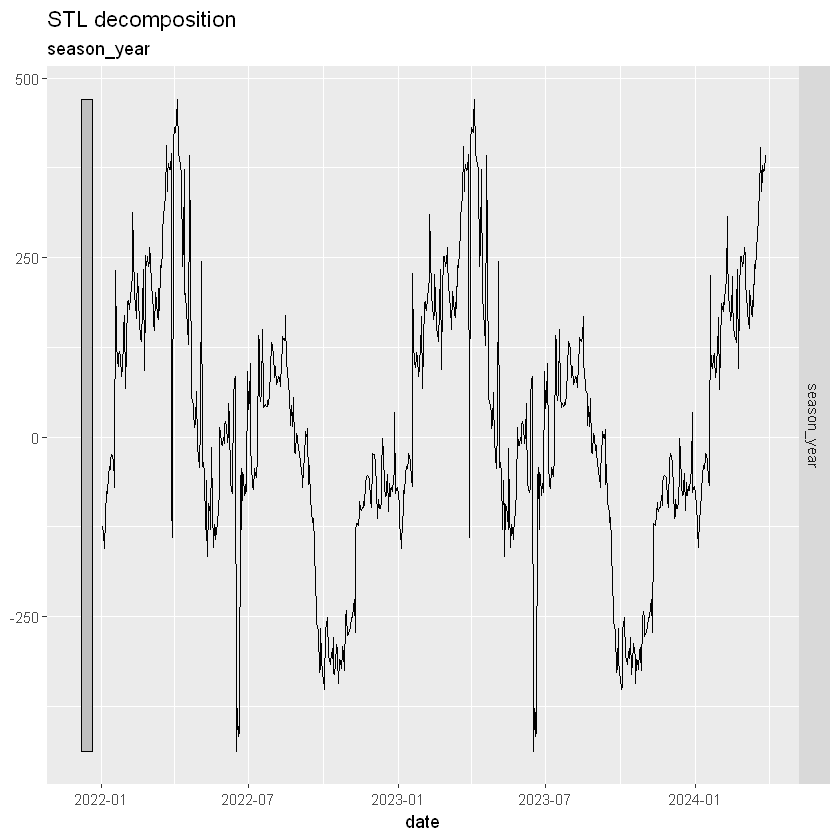

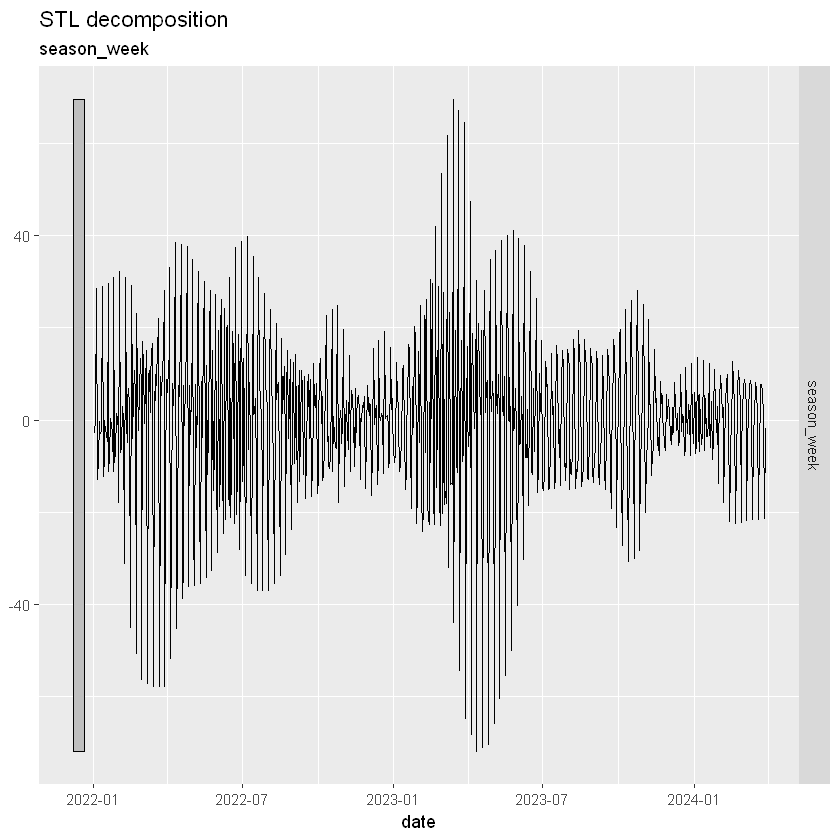

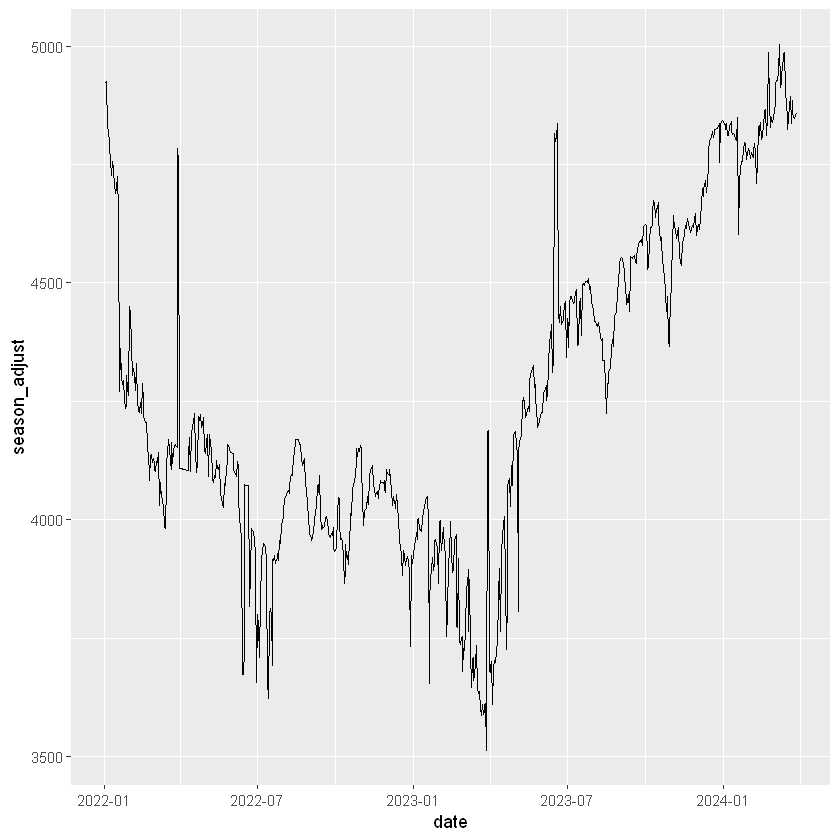

In [12]:
comp_stl %>% 
  autoplot(season_year)
comp_stl %>% 
  autoplot(season_week)
comp_stl %>% 
  ggplot(aes(x = date, y = season_adjust)) +
  geom_line()

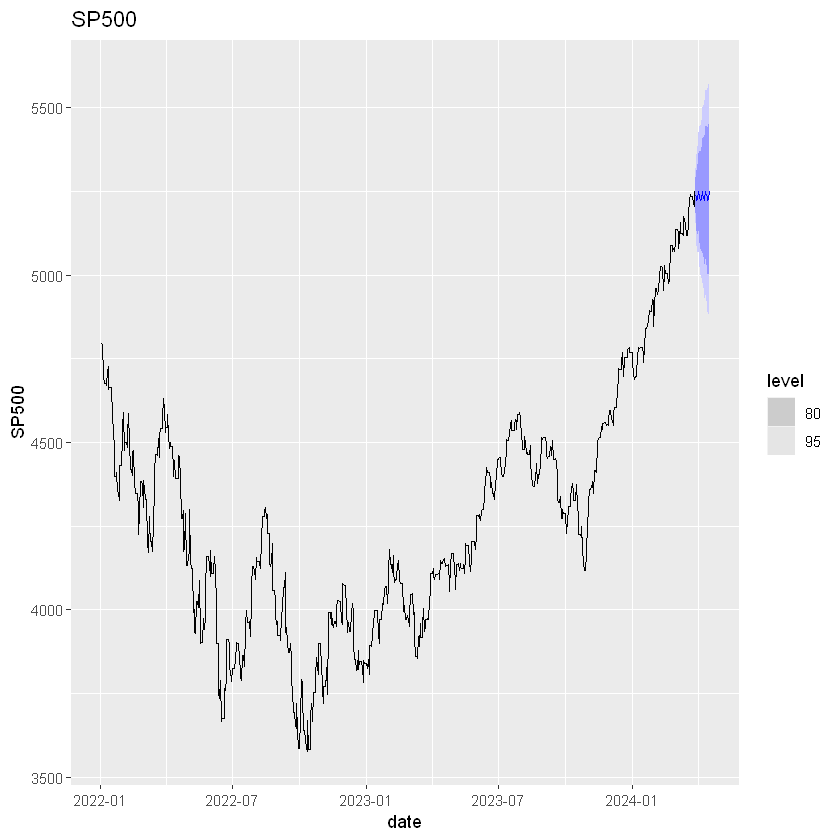

In [13]:

my_dcmp_spec <- decomposition_model(
  STL(adjusted ~ season(period = 5),
      robust = TRUE),
  ETS(season_adjust)
)
fc <- data_fill_na |>
  model(my_dcmp_spec) |>
  forecast(h = 20)


plot = fc |>
  fill_gaps() |>
  autoplot(data_fill_na) +
  labs(y = "SP500",
       title = "SP500")

plot


In [14]:
fit3 <- data_fill_na %>% 
  model(
    harmonic = ARIMA(adjusted ~ trend() + fourier(period = 5, K = 2) + fourier(period = 252, K = 20))
  )

Warning message in sqrt(diag(best$var.coef)):
"NaNs produced"


In [22]:
fit3 <- data_fill_na %>% 
  model(
    harmonic = ARIMA(adjusted ~ fourier(period = "week", K = 2) +
          fourier(period = "year", K = 3))

  )

In [25]:
library(fable.prophet)
colnames(data) = c("ds", "y")

ERROR: Error in library(fable.prophet): there is no package called 'fable.prophet'


In [23]:
fit_prophet = data %>% model(prophet = prophet(y))

ERROR: Error in prophet(y): could not find function "prophet"


In [24]:
fit_prophet |>
  components() |>
  autoplot()

ERROR: Error in components(fit_prophet): object 'fit_prophet' not found


In [ ]:
components(fit_prophet)

In [ ]:
fit_prophet = data %>% model(prophet(y ~ season(type = "additive")))

fc <- fit_prophet %>% forecast(h = 25)
fc %>% autoplot(data)

In [ ]:
fit_prophet = data %>% model(prophet(y ~ season(period = "day", order = 5) +
                                        season(period = "week", order = 2) +
                                        season(period = "year", order = 2)))


{r}
fc <- fit_prophet %>% forecast(h = 25)
fc %>% autoplot(data)
